## ThinkDSP

This notebook contains solutions to exercises in Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [173]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [174]:
from thinkdsp import decorate

### Exercise 1

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves? 

### Solution

我的class解答
1.cycle 是從開始時間到現在有幾個循環(cycle)。np.modf 會把 cycle 的小數部份放在 frac，整數部份則會忽略。

2.frac 是一個序列，裡面的每個值都是給定的頻率的斜率，在這裡會將cycles的小數存入frac

3.unbias 移動波形往下，所以讓它的中心在 0。接下來則是正規化，讓它可以符合給定的振幅 amp。

In [175]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np
#offset 向位移 freq 頻率 ts 時間
class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / np.pi / 2          
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys
#SawtoothSignal??

試著放出聲音及畫出wave

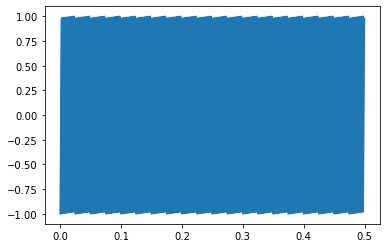

In [176]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
SawtoothSignal().make_wave(duration=0.5, framerate=40000).plot()
sawtooth.make_audio()

將wave轉成頻譜

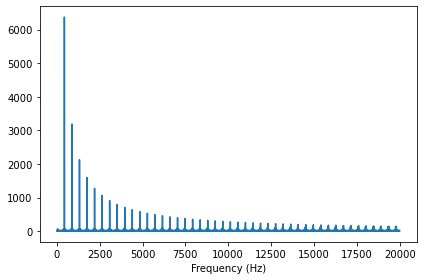

In [177]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

與方波相比，鋸齒波下降得類似，但它包括偶次和奇次諧波，為了比較方波與鋸齒波，我必須削減方波的幅度以使其具有可比性。這裡將amp設為0.5

灰色為鋸齒波，藍色為方波。

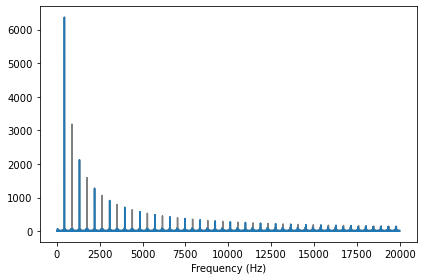

In [178]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')
#sawtooth.make_wave().plot()

接著來比對三角波與鋸齒波，我們從圖中發現三角波的下降速度較快
灰色為鋸齒波，藍色為三角波。

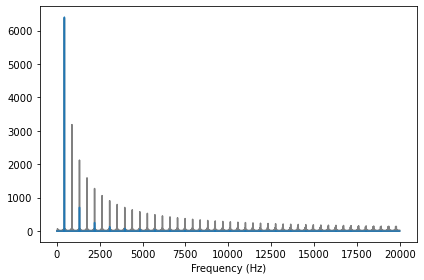

In [179]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Specifically, the harmonics of the triangle wave drop off in proportion to $1/f^2$, while the sawtooth drops off like $1/f$.

### Exercise 2

Make a square signal at 1500 Hz and make a wave that samples it
at 10000 frames per second.  If you plot the spectrum, you can
see that most of the harmonics are aliased.
When you listen to the wave, can you hear the aliased harmonics? 

### Solution

畫方波

In [180]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

轉頻譜

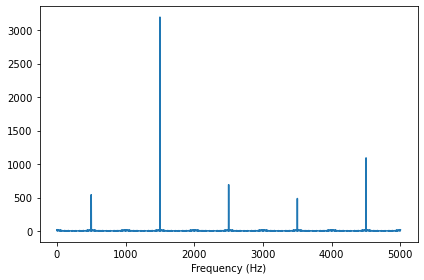

In [181]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

You can see the fundamental at 1500 Hz and the first harmonic at 4500 Hz, but the second harmonic, which should be at 7500 Hz, is aliased to 2500 Hz.
n*fundamental n=3,5,7,9..

The third harmonic, which should be at 10500 Hz, would get aliased to -500 Hz, but that gets aliased again to 500 Hz.

And the 4th harmonic, which should be at 13500 Hz, ends up at 3500 Hz.

The 5th harmonic, which should be at 16500 Hz, ends up at 1500 Hz, so it contributes to the fundamental.

The remaining harmonics overlap with the ones we've already seen.

When you listen to the wave, the fundamental pitch you perceive is the alias at 500 Hz.
正確來說1500 4500 7500 10500 13500 16500
但事實上 500 1500 2500  3500  4500  1500

你可以看到1500 Hz時的基波和4500 Hz時的一次諧波，但是應為7500 Hz的二次諧波失真值為2500 Hz。(7000-4500=2500)

三次諧波應為10500 Hz，將混疊為-500 Hz，但再次混疊為500 Hz。

而應該在13500 Hz處產生的4次諧波在3500 Hz處結束。

應當在16500 Hz處產生的5次諧波在1500 Hz處結束，因此有助於基波。

其餘的諧波與我們已經看到的諧波重疊。

聆聽電波時，您感覺到的基本音高是500 Hz時的失真。

In [182]:
square.make_audio()

在此比較頻率為500的三角波讓你更了解

In [183]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

### Exercise 3

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

### Solution

Here's the triangle wave:

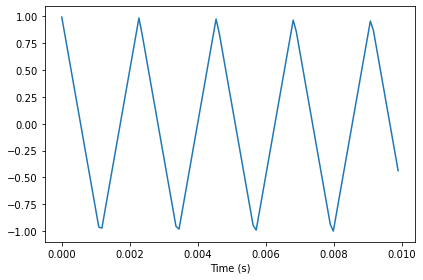

In [184]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

The first element of the spectrum is a complex number close to zero.

In [185]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

If we add to the zero-frequency component, it has the effect of adding a vertical offset to the wave.

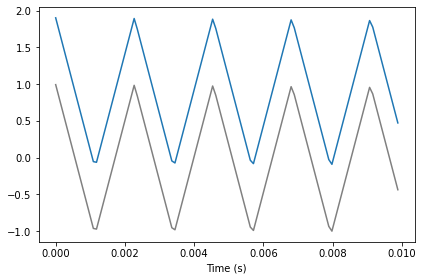

In [186]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

The zero-frequency component is the total of all the values in the signal, as we'll see when we get into the details of the DFT.  If the signal is unbiased, the zero-frequency component is 0.  In the context of electrical signals, the zero-frequency term is called the DC offset; that is, a direct current offset added to an AC signal.

### Exercise 4

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

### Solution

Here's my version of the function:

In [187]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.
    
    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:] #[1]~size
    spectrum.hs[0] = 0

製造三角波

In [188]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Here's what the before and after look like.  I scaled the after picture to make it visible on the same scale.
過濾後的為灰色(hs/fs)

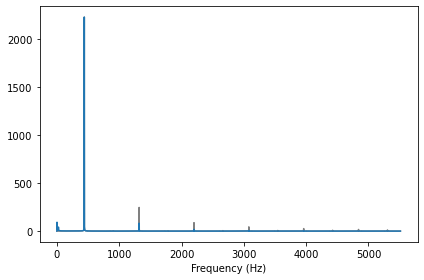

In [189]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000) #high為x軸的raange
decorate(xlabel='Frequency (Hz)')

經過過濾後，頻率會降低，聽起來也確實如此。

In [190]:
filtered = spectrum.make_wave()
filtered.make_audio()

The triangle wave now sounds almost like a sine wave.

### Exercise 5

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

### Solution

One option is to start with a sawtooth wave, which has all of the harmonics we need:

In [191]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

畫出頻譜他的下降看起來為1/f

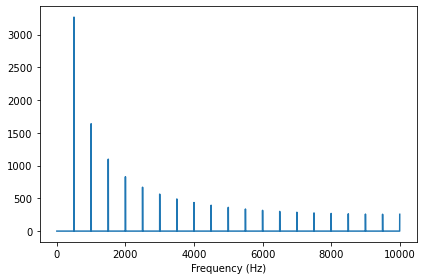

In [192]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

用運上次的過濾函式因為原本鋸齒波就是以1/f下降，而過濾函式再除以一個f達成1/f^2

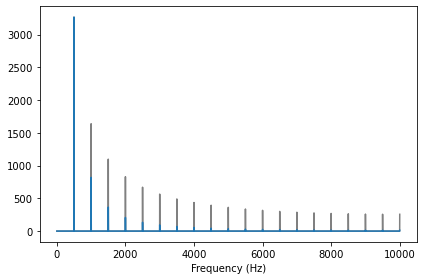

In [193]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

演奏

In [194]:
wave = spectrum.make_wave()
wave.make_audio()

畫波型圖

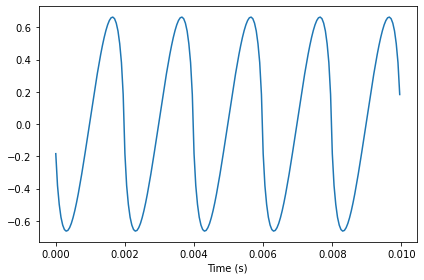

In [195]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

這是一個有趣的形狀，但不容易看出它的功能形式是什麼。

另一種方法是將一系列具有正確頻率和幅度的餘弦信號相加。

In [196]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps)) #zip 將兩個array->(freqs,amp)並兩兩相加
signal

Here's what the spectrum looks like:

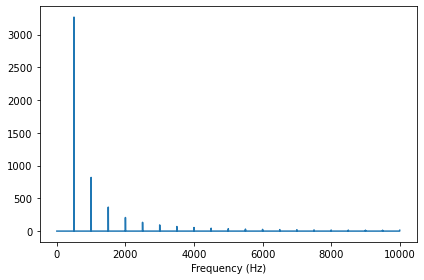

In [197]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

演奏

In [198]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

波型圖

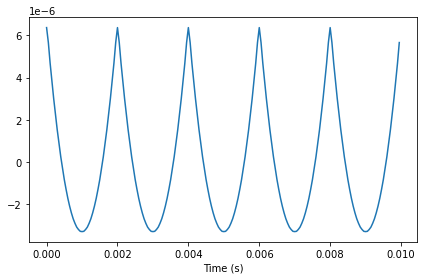

In [199]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

If you think those like parabolas, you might be right.  `thinkdsp` provides `ParabolicSignal`, which computes parabolic waveforms.
如果您認為這些東西像拋物線，那麼您可能是對的。 “ thinkdsp”提供了“ ParabolicSignal”，它可以計算拋物線波形。

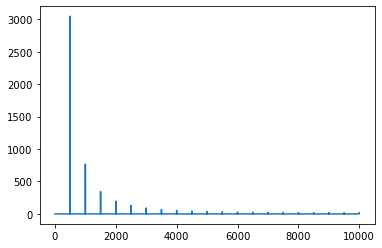

In [200]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
spectrum=wave.make_spectrum()
spectrum.plot()
wave.make_audio()

Here's what the waveform looks like:

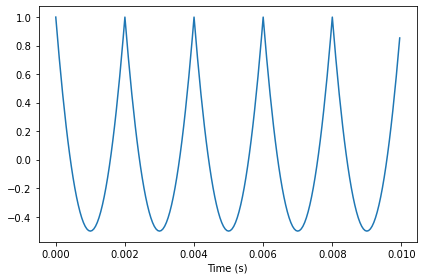

In [201]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')

A parabolic signal has even and odd harmonics which drop off like $1/f^2$:

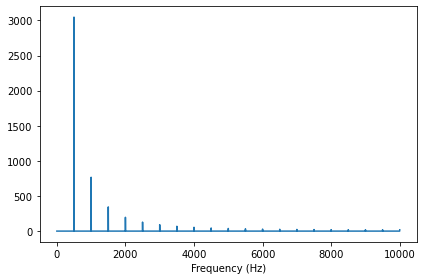

In [202]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')